# SW Exercise 3
### Bus Adm 745 - Madeline Henry

# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
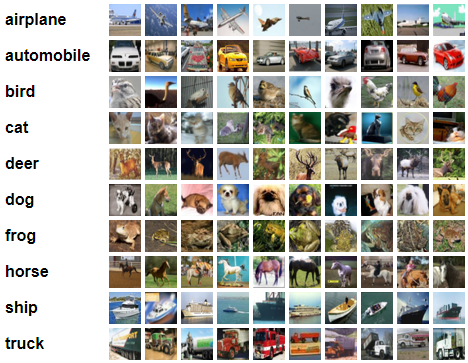
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras  # API for TensorFlow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# load dataset
from keras.datasets import cifar10

# Split into testing and training data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


First, set the data types for x_train and x_test as ‘float32’. Next, set the data types for the 
categorical labels (y_train and y_test).

### 1. Print the first row of the training dataset, both the x and y values.

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


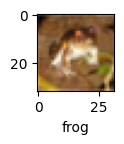

In [2]:
# Normalize dataset to 01 to 1 range by dividing each pixel value by 255.0
# Pixel values for each channel (RGB) can range from 0 to 256 for each RGB. Each number represents a color code. 

# Set data type and normalize features
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Reshape target
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train_names = y_train
y_test_names = y_test

#Set data type for categorical labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Print the first row of the training dataset
print(x_train[0], y_train[0])

# Image plot and class name label for first row of training dataset
def plot_sample(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])
    plt.xlabel(class_names[y[index]])
    
plot_sample(x_train, y_train_names, 0)

### 2. Define a neural network with two hidden layers. 

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), 
    keras.layers.Dense(3000, activation='relu'), 
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


There are 12,230,010 trainable parameters in this model. 

### 3. Build a neural network based on the training dataset; use a batch size of 64 and an epoch of 20. 

In [4]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
model.fit(x_train, y_train, batch_size=64, epochs=20)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train Loss: ", train_loss)
print("Train Acc: ", train_acc)
print("Tested Loss: ", test_loss)
print("Tested Acc: ", test_acc)

Epoch 1/20
782/782 [==============================] - 3s 2ms/step - loss: 1.8616 - accuracy: 0.3382
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 1.6827 - accuracy: 0.4101
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 1.6069 - accuracy: 0.4359
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 1.5520 - accuracy: 0.4554
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 1.5080 - accuracy: 0.4720
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 1.4694 - accuracy: 0.4851
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 1.4381 - accuracy: 0.4945
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 1.4080 - accuracy: 0.5075
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 1.3785 - accuracy: 0.5186
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 1.3514 - accuracy: 0.5290

After 20 epochs, the accuracy value was approximately 53% on the training set and 46% on the test set. Although 46% is an improvement over random guessing, it is still a poor accuracy score which is not likely to be reliable enough to use in any real life application. I would say that overall, this model does not perform well. 

### 4. Using the same parameters as question 3, build the neural network over 40 epochs. 

In [5]:
# train model
model.fit(x_train, y_train, batch_size=64, epochs=40)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train Loss: ", train_loss)
print("Train Acc: ", train_acc)
print("Tested Loss: ", test_loss)
print("Tested Acc: ", test_acc)

Epoch 1/40
782/782 [==============================] - 2s 3ms/step - loss: 1.1216 - accuracy: 0.6106
Epoch 2/40
782/782 [==============================] - 2s 2ms/step - loss: 1.1044 - accuracy: 0.6190
Epoch 3/40
782/782 [==============================] - 2s 2ms/step - loss: 1.0857 - accuracy: 0.6264
Epoch 4/40
782/782 [==============================] - 2s 2ms/step - loss: 1.0703 - accuracy: 0.6309
Epoch 5/40
782/782 [==============================] - 2s 2ms/step - loss: 1.0539 - accuracy: 0.6361
Epoch 6/40
782/782 [==============================] - 2s 3ms/step - loss: 1.0355 - accuracy: 0.6430
Epoch 7/40
782/782 [==============================] - 2s 2ms/step - loss: 1.0197 - accuracy: 0.6505
Epoch 8/40
782/782 [==============================] - 2s 2ms/step - loss: 1.0007 - accuracy: 0.6553
Epoch 9/40
782/782 [==============================] - 2s 3ms/step - loss: 0.9828 - accuracy: 0.6615
Epoch 10/40
782/782 [==============================] - 2s 2ms/step - loss: 0.9687 - accuracy: 0.6702

After 40 epochs, the accuracy value was approximately 81% on the training set and 53% on the test set. While this is an improvement over the same model with 20 epochs and, certainly, better than random guessing, I would still not consider this a well performing model overall. At this point, the trained neural network is still not accurate enough to be relied upon in real life application.

### 5. Select any image from the test set and apply your trained neural net model to predict its class.

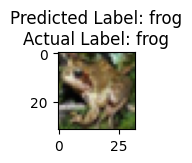

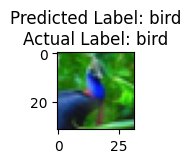

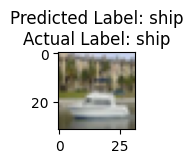

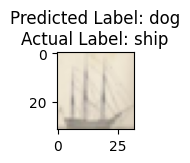

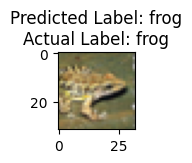

In [6]:
from random import *

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

def plot_pred(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_test[index])
    plt.title(f'Predicted Label: {class_names[y_pred_classes[index]]}\nActual Label: {class_names[y_test_names[index]]}')

plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))